In [ ]:
%matplotlib inline

In [ ]:
!wget https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip -P data
!cd data && unzip PennFudanPed.zip

--2025-08-07 20:47:06--  https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip
Resolving www.cis.upenn.edu (www.cis.upenn.edu)... 158.130.69.163, 2607:f470:8:64:5ea5::d
Connecting to www.cis.upenn.edu (www.cis.upenn.edu)|158.130.69.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53723336 (51M) [application/zip]
Saving to: ‘data/PennFudanPed.zip’

PennFudanPed.zip    100%[===================>]  51.23M   123MB/s    in 0.4s    

2025-08-07 20:47:06 (123 MB/s) - ‘data/PennFudanPed.zip’ saved [53723336/53723336]

Archive:  PennFudanPed.zip
   creating: PennFudanPed/
  inflating: PennFudanPed/added-object-list.txt  
   creating: PennFudanPed/Annotation/
  inflating: PennFudanPed/Annotation/FudanPed00001.txt  
  inflating: PennFudanPed/Annotation/FudanPed00002.txt  
  inflating: PennFudanPed/Annotation/FudanPed00003.txt  
  inflating: PennFudanPed/Annotation/FudanPed00004.txt  
  inflating: PennFudanPed/Annotation/FudanPed00005.txt  
  inflating: PennFudanPed

In [ ]:
!git clone https://github.com/s-reaungamornrat/video_processing.git

Cloning into 'video_processing'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 54 (delta 24), reused 52 (delta 22), pack-reused 0 (from 0)
Receiving objects: 100% (54/54), 9.41 KiB | 9.41 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [ ]:
from video_processing.mask_rcnn.utils.utils import read_annotation, display_image_overlay

image  <class 'torch.Tensor'> torch.Size([3, 438, 567]) torch.uint8
mask  <class 'torch.Tensor'> torch.Size([1, 438, 567]) torch.uint8
{'obj_num': [1, 2, 3, 4], 'label': ['PASpersonWalking', 'PASpersonWalking', 'PASpersonStanding', 'PASpersonWalking'], 'bbox': [[[178, 123], [271, 410]], [[299, 114], [370, 335]], [[446, 104], [507, 315]], [[521, 119], [565, 258]]]}


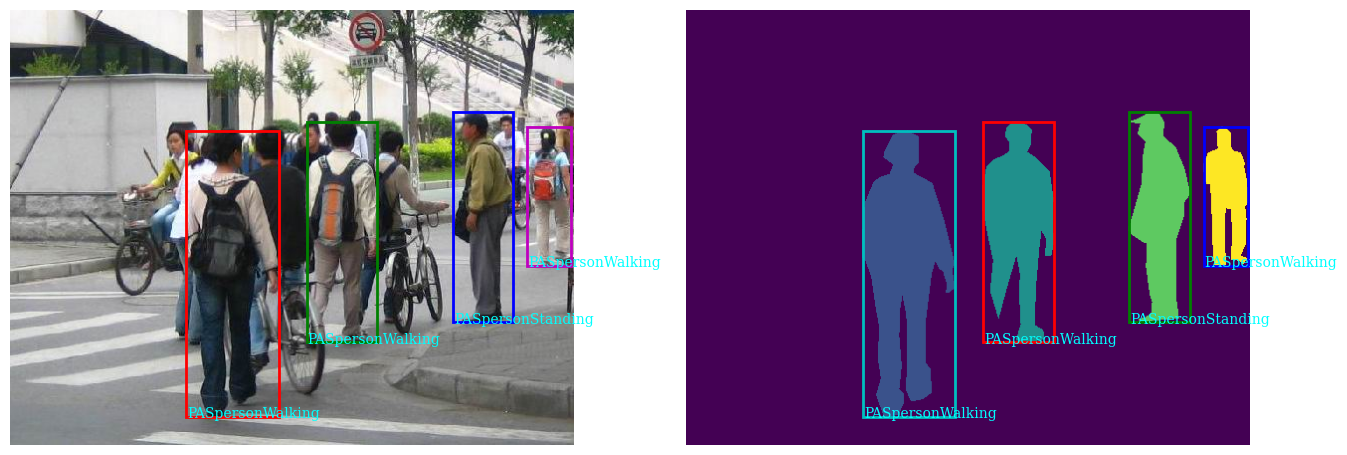

In [ ]:
from torchvision.io import read_image

image=read_image('data/PennFudanPed/PNGImages/FudanPed00046.png') # CxHxW -> CxYxX
mask=read_image('data/PennFudanPed/PedMasks/FudanPed00046_mask.png') # CxHxW -> CxYxX
print('image ', type(image), image.shape, image.dtype)
print('mask ', type(mask), mask.shape, mask.dtype)

annotation=read_annotation('data/PennFudanPed/Annotation/FudanPed00046.txt')
print(annotation)
display_image_overlay(image=image, mask=mask, annotation=annotation)

In [ ]:
import os
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/utils.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_utils.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_eval.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/transforms.py")

0

In [ ]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

device=torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print('device ', device)

num_classes=2
# load an instance segmentation model pre-trained on COCO
model=torchvision.models.detection.maskrcnn_resnet50_fpn_v2(weights='DEFAULT')
# # get number of input features for the classifier
# in_features=model.roi_heads.box_predictor.cls_score.in_features
# print('the number of inpute features for classifiers ', in_features)
# # replace the pre-trained head with a new one
# model.roi_heads.box_predictor=FastRCNNPredictor(in_features,  num_classes)

# # get the number of input features for the mask classifiers
# in_features_mask=model.roi_heads.mask_predictor.conv5_mask.in_channels
# print('the number of input features for mask ', in_features_mask)
# hidden_layer=256
# # and replace the mask predictor with a new one
# model.roi_heads.mask_predictor=MaskRCNNPredictor(in_features_mask, hidden_layer, num_classes)

# move model to the right device
model.to(device)

device  cpu


Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_v2_coco-73cbd019.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_v2_coco-73cbd019.pth
100%|██████████| 177M/177M [00:02<00:00, 76.5MB/s]


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         

In [ ]:
import torch

import utils
from video_processing.mask_rcnn.dataset.penn_fudan_ped import PennFudanDataset, get_transform

train_dataset=PennFudanDataset(root='data/PennFudanPed', image_dirname='PNGImages', mask_dirname='PedMasks', annotation_dirname='Annotation',
                         transforms=get_transform(is_train=True))#, image_mean=model.transform.image_mean, image_std=model.transform.image_std,
                                                  #min_size=model.transform.min_size, max_size=model.transform.max_size))

# define training and validation data loaders
tarin_loader = torch.utils.data.DataLoader(train_dataset, batch_size=2,shuffle=True,collate_fn=utils.collate_fn)

2  images  [torch.Size([3, 354, 479]), torch.Size([3, 418, 672])] [(torch.float32, tensor(0.), tensor(1.)), (torch.float32, tensor(0.), tensor(1.))]
2  targets  [{'boxes': torch.Size([3, 4]), 'masks': torch.Size([3, 354, 479]), 'labels': torch.Size([3]), 'image_id': 103, 'area': torch.Size([3]), 'iscrowd': torch.Size([3])}, {'boxes': torch.Size([4, 4]), 'masks': torch.Size([4, 418, 672]), 'labels': torch.Size([4]), 'image_id': 102, 'area': torch.Size([4]), 'iscrowd': torch.Size([4])}]
masks  [(torch.uint8, tensor(0, dtype=torch.uint8), tensor(1, dtype=torch.uint8)), (torch.uint8, tensor(0, dtype=torch.uint8), tensor(1, dtype=torch.uint8))]


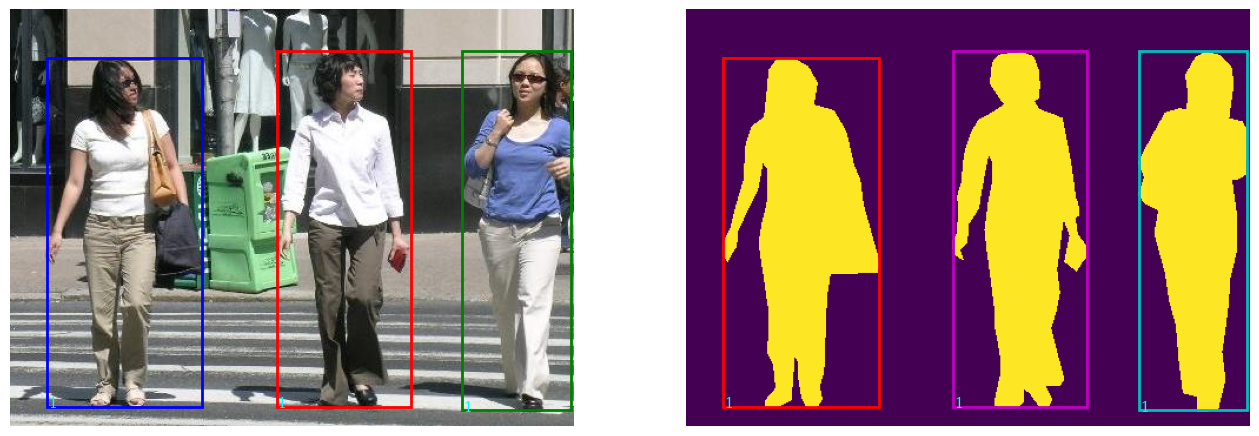

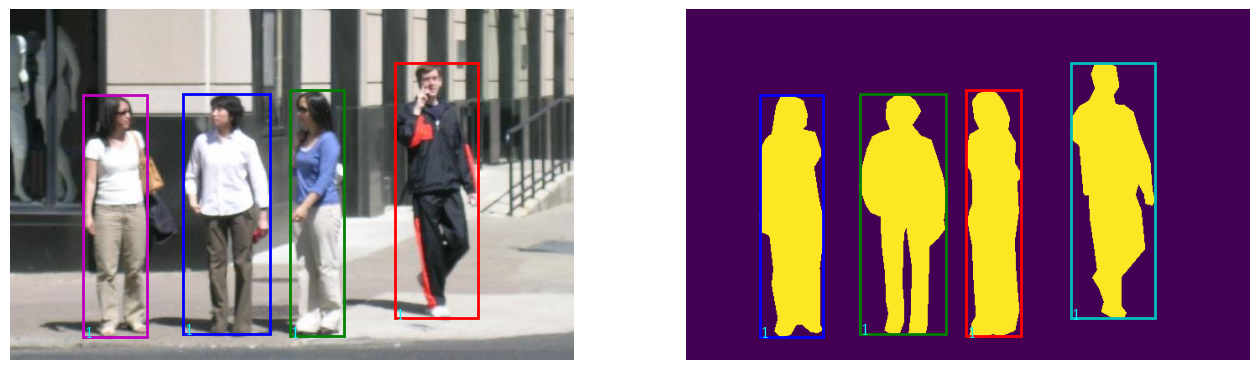

In [ ]:
# For training
images, targets=next(iter(tarin_loader))
print(len(images), ' images ', [x.shape for x in images], [(x.dtype, x.min(), x.max()) for x in images])
print(len(targets), ' targets ', [{k:(v if not isinstance(v, torch.Tensor) else v.shape) for k, v in target.items()} for target in targets])
print('masks ', [(target['masks'].dtype, target['masks'].min(), target['masks'].max()) for target in targets])


for i in range(len(images)):
  annotation={'bbox':[[box.squeeze()[2*i:(2*i+2)] for i in range(2)] for box in targets[i]['boxes'].split(1, dim=0)],
              'label':[f'{l}' for l in targets[i]['labels']]}
  display_image_overlay(image=(images[i]*255).type(torch.uint8), mask=targets[i]['masks'].sum(dim=0, keepdim=True), annotation=annotation)

In [ ]:
model.backbone

BackboneWithFPN(
  (body): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): 

In [ ]:
print('body return_layers ', model.backbone.body.return_layers)
model.backbone.body

body return_layers  {'layer1': '0', 'layer2': '1', 'layer3': '2', 'layer4': '3'}


IntermediateLayerGetter(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [ ]:
model.backbone.fpn

FeaturePyramidNetwork(
  (inner_blocks): ModuleList(
    (0): Conv2dNormActivation(
      (0): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Conv2dNormActivation(
      (0): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): Conv2dNormActivation(
      (0): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): Conv2dNormActivation(
      (0): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (layer_blocks): ModuleList(
    (0-3): 4 x Conv2dNormActivation(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1,

In [ ]:
model.rpn

RegionProposalNetwork(
  (anchor_generator): AnchorGenerator()
  (head): RPNHead(
    (conv): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
      )
      (1): Conv2dNormActivation(
        (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
      )
    )
    (cls_logits): Conv2d(256, 3, kernel_size=(1, 1), stride=(1, 1))
    (bbox_pred): Conv2d(256, 12, kernel_size=(1, 1), stride=(1, 1))
  )
)

In [ ]:
model.roi_heads.mask_roi_pool

MultiScaleRoIAlign(featmap_names=['0', '1', '2', '3'], output_size=(14, 14), sampling_ratio=2)

In [ ]:
model.roi_heads.mask_head

MaskRCNNHeads(
  (0): Conv2dNormActivation(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (1): Conv2dNormActivation(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (2): Conv2dNormActivation(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (3): Conv2dNormActivation(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
)

In [ ]:
model.roi_heads.mask_predictor

MaskRCNNPredictor(
  (conv5_mask): ConvTranspose2d(256, 256, kernel_size=(2, 2), stride=(2, 2))
  (relu): ReLU(inplace=True)
  (mask_fcn_logits): Conv2d(256, 91, kernel_size=(1, 1), stride=(1, 1))
)

2  images  [torch.Size([3, 345, 317]), torch.Size([3, 420, 546])] [(torch.float32, tensor(0.), tensor(1.)), (torch.float32, tensor(0.), tensor(1.))]
2  targets  [{'boxes': torch.Size([2, 4]), 'masks': torch.Size([2, 345, 317]), 'labels': torch.Size([2]), 'image_id': 27, 'area': torch.Size([2]), 'iscrowd': torch.Size([2])}, {'boxes': torch.Size([3, 4]), 'masks': torch.Size([3, 420, 546]), 'labels': torch.Size([3]), 'image_id': 63, 'area': torch.Size([3]), 'iscrowd': torch.Size([3])}]
masks  [(torch.uint8, tensor(0, dtype=torch.uint8), tensor(1, dtype=torch.uint8)), (torch.uint8, tensor(0, dtype=torch.uint8), tensor(1, dtype=torch.uint8))]


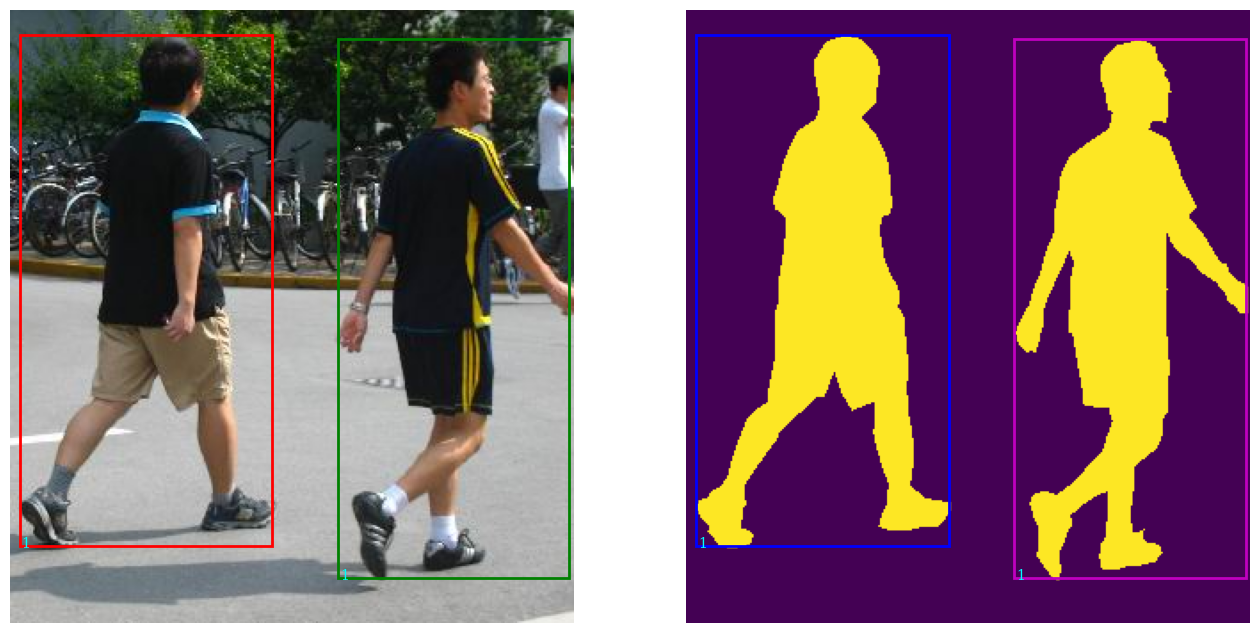

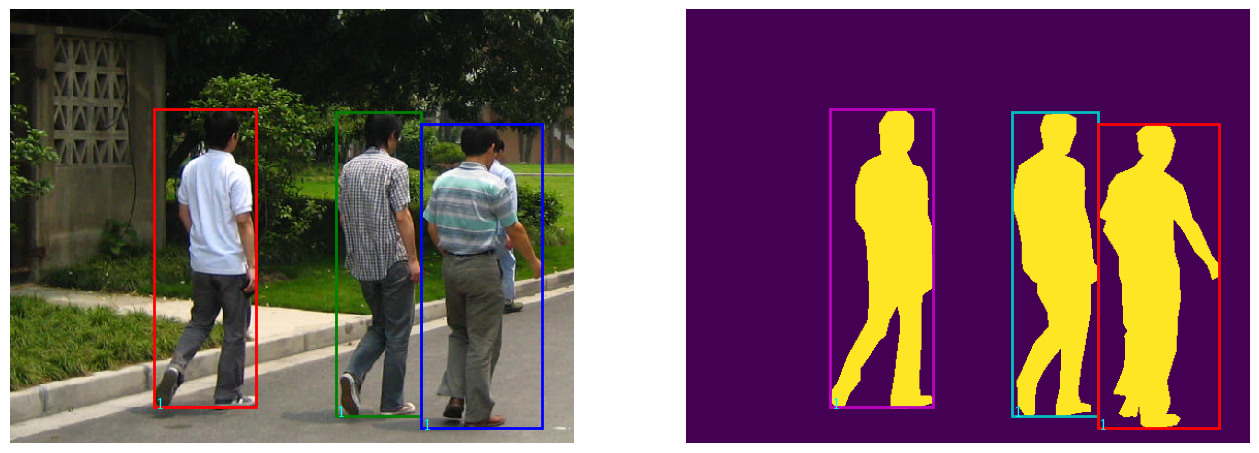

In [ ]:
# For training
images, targets=next(iter(tarin_loader))
print(len(images), ' images ', [x.shape for x in images], [(x.dtype, x.min(), x.max()) for x in images])
print(len(targets), ' targets ', [{k:(v if not isinstance(v, torch.Tensor) else v.shape) for k, v in target.items()} for target in targets])
print('masks ', [(target['masks'].dtype, target['masks'].min(), target['masks'].max()) for target in targets])


for i in range(len(images)):
    annotation={'bbox':[[box.squeeze()[2*i:(2*i+2)] for i in range(2)] for box in targets[i]['boxes'].split(1, dim=0)],
              'label':[f'{l}' for l in targets[i]['labels']]}
    display_image_overlay(image=(images[i]*255).type(torch.uint8), mask=targets[i]['masks'].sum(dim=0, keepdim=True), annotation=annotation)

### Training `forward()`

In [ ]:
# check that bounding box size is correct
for target in targets:
    boxes=target['boxes']
    if isinstance(boxes, torch.Tensor):
        assert(len(boxes.shape)==2 and boxes.shape[-1]==4), f'Expected target boxes to be a tensor of shape [N,4], got {boxes.shape}'
    else:
        assert False, f'Expected target boxes to be of type Tensor, got {type(boxes)}.'

In [ ]:
# check for degenerate boxes
for target_idx, target in enumerate(targets):
    boxes=target['boxes']
    # Nx2 because this check element wise whether x2, y2 <= x1, y1
    degenerate_boxes=boxes[:,2:]<=boxes[:, :2]
    if degenerate_boxes.any():
        bb_idx=torch.where(degenerate_boxes.any(dim=1)) # which box in N and which dimension, e.g., box 1 along y dim
        degen_bb=boxes[bb_idx].tolist()
        assert False, f'All bounding boxes should have positive height and width\nFound invalid box {degen_bb} for target at index {target_idx}'

In [ ]:
original_image_sizes=[]
for img in images:
    size=img.shape[-2:]
    print(img.shape, img.min(), img.max())
    assert len(size)==2, f'Expect the last two dimensions of the Tensor to be H and W, but got {img.shape[-2:]} instead'
    original_image_sizes.append((size[0], size[1]))
print('original_image_sizes ', original_image_sizes)

torch.Size([3, 345, 317]) tensor(0.) tensor(1.)
torch.Size([3, 420, 546]) tensor(0.) tensor(1.)
original_image_sizes  [(345, 317), (420, 546)]


In [ ]:
targets[0]['boxes'], targets[0]['area'],

(tensor([[  6.,  15., 148., 302.],
         [185.,  17., 315., 320.]]),
 tensor([40754., 39390.]))

In [ ]:
images_, targets_ = model.transform(images, targets)
print('images_ ', images_.tensors.shape, images_.tensors.min(), images_.tensors.max())
for i in range(len(targets_)):
    print('targets_ ', {k:(v.shape, v.min(), v.max(), v.dtype) if isinstance(v,torch.Tensor) else v for k, v in targets_[0].items()})
targets_[0]['boxes']

images_  torch.Size([2, 3, 896, 1056]) tensor(-2.1179) tensor(2.6400)
targets_  {'boxes': (torch.Size([2, 4]), tensor(15.1420), tensor(806.9565), torch.float32), 'masks': (torch.Size([2, 870, 800]), tensor(0, dtype=torch.uint8), tensor(1, dtype=torch.uint8), torch.uint8), 'labels': (torch.Size([2]), tensor(1), tensor(1), torch.int64), 'image_id': 27, 'area': (torch.Size([2]), tensor(39390.), tensor(40754.), torch.float32), 'iscrowd': (torch.Size([2]), tensor(0), tensor(0), torch.int64)}
targets_  {'boxes': (torch.Size([2, 4]), tensor(15.1420), tensor(806.9565), torch.float32), 'masks': (torch.Size([2, 870, 800]), tensor(0, dtype=torch.uint8), tensor(1, dtype=torch.uint8), torch.uint8), 'labels': (torch.Size([2]), tensor(1), tensor(1), torch.int64), 'image_id': 27, 'area': (torch.Size([2]), tensor(39390.), tensor(40754.), torch.float32), 'iscrowd': (torch.Size([2]), tensor(0), tensor(0), torch.int64)}


tensor([[ 15.1420,  37.8261, 373.5016, 761.5652],
        [466.8770,  42.8696, 794.9526, 806.9565]])

### Backbone Body

In [ ]:
from collections import OrderedDict

x=images_.tensors
print('x ', x.shape, x.min(), x.max())
print('return layers ', model.backbone.body.return_layers)
# we first pass the input images to body in the backbone (i.e., not FPN)
out = OrderedDict()
for name, module in model.backbone.body.items():
    x = module(x)
    print(name, x.shape)
    if name in model.backbone.body.return_layers:
        out_name = model.backbone.body.return_layers[name]
        out[out_name] = x
        print(name, out_name, x.shape)
print('\n\nout ', {k:(x.shape, x.min(), x.max(), x.dtype) for k, x in out.items()})

x  torch.Size([2, 3, 896, 1056]) tensor(-2.1179) tensor(2.6400)
return layers  {'layer1': '0', 'layer2': '1', 'layer3': '2', 'layer4': '3'}
conv1 torch.Size([2, 64, 448, 528])
bn1 torch.Size([2, 64, 448, 528])
relu torch.Size([2, 64, 448, 528])
maxpool torch.Size([2, 64, 224, 264])
layer1 torch.Size([2, 256, 224, 264])
layer1 0 torch.Size([2, 256, 224, 264])
layer2 torch.Size([2, 512, 112, 132])
layer2 1 torch.Size([2, 512, 112, 132])
layer3 torch.Size([2, 1024, 56, 66])
layer3 2 torch.Size([2, 1024, 56, 66])
layer4 torch.Size([2, 2048, 28, 33])
layer4 3 torch.Size([2, 2048, 28, 33])


out  {'0': (torch.Size([2, 256, 224, 264]), tensor(0.), tensor(3.7373), torch.float32), '1': (torch.Size([2, 512, 112, 132]), tensor(0., grad_fn=<MinBackward1>), tensor(3.6120, grad_fn=<MaxBackward1>), torch.float32), '2': (torch.Size([2, 1024, 56, 66]), tensor(0., grad_fn=<MinBackward1>), tensor(2.7272, grad_fn=<MaxBackward1>), torch.float32), '3': (torch.Size([2, 2048, 28, 33]), tensor(0., grad_fn=<Min

### Backbone FPN

In [ ]:
import torch.nn.functional as F

# we then pass feature to FPN
x=out
names=list(x.keys())
x=list(x.values())
print('names ', names)
print('x ', [i.shape for i in x])

# we move from the output from the backbone-body deepest layer (having the bigger number of channels)
last_inner=model.backbone.fpn.inner_blocks[-1](x[-1])
print('last_inner ', last_inner.shape, last_inner.min(), last_inner.max())
results=[model.backbone.fpn.layer_blocks[-1](last_inner)]
print('last result ', results[0].shape, results[0].min(), results[0].max())

# we get from the one after deepest layer (i.e., top down)
for idx in range(len(x)-2, -1, -1):
    inner_lateral=model.backbone.fpn.inner_blocks[idx](x[idx])
    feat_shape=inner_lateral.shape[-2:]
    inner_top_down = F.interpolate(last_inner, size=feat_shape, mode="nearest")
    print(idx, ' last_inner ', last_inner.shape, ' feat_shape ', feat_shape, end=',')
    last_inner=inner_lateral+inner_top_down
    results.insert(0, model.backbone.fpn.layer_blocks[idx](last_inner))
    print(' updated_last_inner ', last_inner.shape, ' result ', results[0].shape)

print('\n\nresults ', [(r.shape, r.min(), r.max()) for r in results])

results, names =model.backbone.fpn.extra_blocks(results, x, names)

print('\n\nname:results ', {n:(r.shape, r.min(), r.max()) for n, r in zip(names,results)})

# make it back an OrderedDict
out=OrderedDict([(k,v) for k, v in zip(names, results)])

names  ['0', '1', '2', '3']
x  [torch.Size([2, 256, 224, 264]), torch.Size([2, 512, 112, 132]), torch.Size([2, 1024, 56, 66]), torch.Size([2, 2048, 28, 33])]
last_inner  torch.Size([2, 256, 28, 33]) tensor(-1.1232, grad_fn=<MinBackward1>) tensor(1.2514, grad_fn=<MaxBackward1>)
last result  torch.Size([2, 256, 28, 33]) tensor(-2.0496, grad_fn=<MinBackward1>) tensor(1.6383, grad_fn=<MaxBackward1>)
